In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


In [ ]:
import zipfile
from zipfile import ZipFile
zf = ZipFile('archive.zip', 'r')
zf.extractall('CatDogPanda')
zf.close()
import os
base_dir = 'CatDogPanda/animals/animals'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val_dir')
dogs_dir = os.path.join(base_dir,'dogs')
cats_dir = os.path.join(base_dir,'cats')
panda_dir = os.path.join(base_dir,'panda')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_dogs = os.path.join(train_dir,'dogs')
train_cats = os.path.join(train_dir,'cats')
train_panda = os.path.join(train_dir,'panda')
val_dogs = os.path.join(validation_dir,'dogs')
val_cats = os.path.join(validation_dir,'cats')
val_panda = os.path.join(validation_dir,'panda')

In [ ]:
os.mkdir(train_dogs)
os.mkdir(train_cats)
os.mkdir(train_panda)
os.mkdir(val_dogs)
os.mkdir(val_cats)
os.mkdir(val_panda)

In [ ]:
from sklearn.model_selection import train_test_split
train_dogs_dir,val_dogs_dir = train_test_split(os.listdir(dogs_dir), test_size=0.2)
train_cats_dir,val_cats_dir = train_test_split(os.listdir(cats_dir), test_size=0.2)
train_panda_dir,val_panda_dir = train_test_split(os.listdir(panda_dir), test_size=0.2)

In [ ]:
import shutil
for file in train_dogs_dir:
  shutil.copy(os.path.join(dogs_dir, file), os.path.join(train_dogs, file))
for file in train_cats_dir:
  shutil.copy(os.path.join(cats_dir,file), os.path.join(train_cats,file))
for file in train_panda_dir:
  shutil.copy(os.path.join(panda_dir,file), os.path.join(train_panda,file))
for file in val_dogs_dir:
  shutil.copy(os.path.join(dogs_dir, file), os.path.join(val_dogs,file))
for file in val_cats_dir:
  shutil.copy(os.path.join(cats_dir,file), os.path.join(val_cats,file))
for file in val_panda_dir:
  shutil.copy(os.path.join(panda_dir,file), os.path.join(val_panda,file))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    rescale=1/255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                    )

test_datagen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    rescale=1/255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    )

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')
#num_class = validation_generator.num_classes

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch= 2400/20,
          epochs=50,
          validation_data=validation_generator,
          validation_steps= 600/20,
          shuffle=True,
          verbose=2, callbacks=[callbacks])

Epoch 1/50
120/120 - 120s - loss: 0.6504 - accuracy: 0.6708 - val_loss: 0.6627 - val_accuracy: 0.6650
Epoch 2/50
120/120 - 120s - loss: 0.6406 - accuracy: 0.6812 - val_loss: 0.6867 - val_accuracy: 0.6317
Epoch 3/50
120/120 - 120s - loss: 0.6081 - accuracy: 0.6971 - val_loss: 0.6595 - val_accuracy: 0.6833
Epoch 4/50
120/120 - 120s - loss: 0.5937 - accuracy: 0.7054 - val_loss: 0.6420 - val_accuracy: 0.6817
Epoch 5/50
120/120 - 120s - loss: 0.5910 - accuracy: 0.7212 - val_loss: 0.6280 - val_accuracy: 0.7133
Epoch 6/50
120/120 - 120s - loss: 0.5714 - accuracy: 0.7175 - val_loss: 0.5774 - val_accuracy: 0.7017
Epoch 7/50
120/120 - 120s - loss: 0.5625 - accuracy: 0.7396 - val_loss: 0.5805 - val_accuracy: 0.7100
Epoch 8/50
120/120 - 120s - loss: 0.5796 - accuracy: 0.7258 - val_loss: 0.6689 - val_accuracy: 0.6850
Epoch 9/50
120/120 - 120s - loss: 0.5583 - accuracy: 0.7379 - val_loss: 0.5400 - val_accuracy: 0.7467
Epoch 10/50
120/120 - 120s - loss: 0.5544 - accuracy: 0.7325 - val_loss: 0.5954 - 

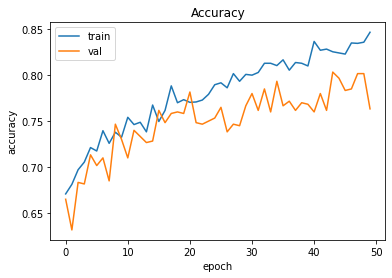

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

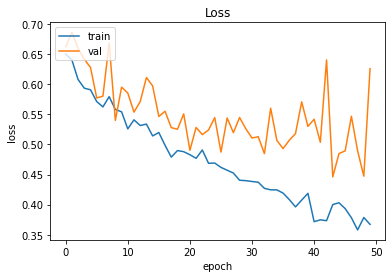

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving 013907000_1573793116-20191114-Debut-Bayi-Kembar-Panda-di-Belgia-AP-3.jpg to 013907000_1573793116-20191114-Debut-Bayi-Kembar-Panda-di-Belgia-AP-3 (1).jpg
013907000_1573793116-20191114-Debut-Bayi-Kembar-Panda-di-Belgia-AP-3.jpg
panda


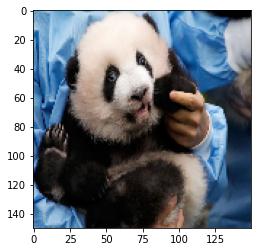

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('dog')
  elif classes[0,1]!=0:
    print('cat')
  else:
    print('panda')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpp1_gzhu8/assets
